<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Insurance_premium_prediction_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries and loading the dataset

## Import libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


## Data set

In [26]:
# Loading the dataset to a pandas Dataframe 
DF=pd.read_csv('/content/drive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/insurance.csv')
print(DF)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


# Data preprocessing 

In [27]:
#cheking for missing vaules
DF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [28]:
# Convert 'expenses' into a binary variable: low (0) or high (1)
threshold = DF['expenses'].quantile(0.5)
DF['expenses'] = np.where(DF['expenses'] > threshold, 1, 0)
DF

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,1
1,18,male,33.8,1,no,southeast,0
2,28,male,33.0,3,no,southeast,0
3,33,male,22.7,0,no,northwest,1
4,32,male,28.9,0,no,northwest,0
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,1
1334,18,female,31.9,0,no,northeast,0
1335,18,female,36.9,0,no,southeast,0
1336,21,female,25.8,0,no,southwest,0


In [29]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
DF['sex'] = le.fit_transform(DF['sex'])
DF['smoker'] = le.fit_transform(DF['smoker'])
DF['region'] = le.fit_transform(DF['region'])
DF

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,1
1,18,1,33.8,1,0,2,0
2,28,1,33.0,3,0,2,0
3,33,1,22.7,0,0,1,1
4,32,1,28.9,0,0,1,0
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,1
1334,18,0,31.9,0,0,0,0
1335,18,0,36.9,0,0,2,0
1336,21,0,25.8,0,0,3,0


## Set y to the label. Check the shape!

In [30]:
y = np.array(DF.iloc[:,-1]).T
y = np.array([y]).T
print("y is\n", y)

y is
 [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


## Normalize the data 

In [31]:
## Normalize the data (not the label!)
## or min/max
## normalized_df=(df-df.min())/(df.max()-df.min())

DF=DF.iloc[:, [1, 2, 3, 4, 5]]
DF=(DF-DF.mean())/DF.std()
print(DF)

X = np.array(DF)

print("X is\n", X)

           sex       bmi  children    smoker    region
0    -1.010141 -0.453476 -0.908274  1.969850  1.343402
1     0.989221  0.513994 -0.078738 -0.507273  0.438331
2     0.989221  0.382811  1.580335 -0.507273  0.438331
3     0.989221 -1.306161 -0.908274 -0.507273 -0.466741
4     0.989221 -0.289498 -0.908274 -0.507273 -0.466741
...        ...       ...       ...       ...       ...
1333  0.989221  0.054855  1.580335 -0.507273 -0.466741
1334 -1.010141  0.202436 -0.908274 -0.507273 -1.371813
1335 -1.010141  1.022325 -0.908274 -0.507273  0.438331
1336 -1.010141 -0.797830 -0.908274 -0.507273  1.343402
1337 -1.010141 -0.256703 -0.908274  1.969850 -0.466741

[1338 rows x 5 columns]
X is
 [[-1.010141   -0.45347615 -0.90827406  1.9698501   1.34340229]
 [ 0.98922092  0.51399356 -0.07873775 -0.50727343  0.43833066]
 [ 0.98922092  0.38281122  1.58033487 -0.50727343  0.43833066]
 ...
 [-1.010141    1.02232509 -0.90827406 -0.50727343  0.43833066]
 [-1.010141   -0.79782977 -0.90827406 -0.50727343  1

## Initializing the input for neural network

In [32]:
InputColumns = 5
NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array

# Assuming the learning rate 

LR=.01
LRB = .01

# Defining the Neural Network class and its methods:

In [33]:
class NeuralNetwork(object):
  def __init__(self):        
    self.InputNumColumns = InputColumns  ## columns
    self.OutputSize = 1 ## Categories
    self.HiddenUnits = 4  ## one layer with h units
    self.n = n  ## number of training examples, n
    
    print("Initialize NN\n")
    #Random W1
    self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
    
    print("INIT W1 is\n", self.W1)
    
    ##-----------------------------------------
    ## NOTE ##
    ##
    ## The following are all random. However, you can comment this out
    ## and can set any weights and biases by hand , etc.
    ##
    ##---------------------------------------------
    
    self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
    print("W2 is:\n", self.W2)
    
    self.b = np.random.randn(1, self.HiddenUnits)
    print("The b's are:\n", self.b)
    ## biases for layer 1
    
    self.c = np.random.randn(1, self.OutputSize)
    print("The c is\n", self.c)
    ## bias for last layer

  def FeedForward(self, X):
      print("FeedForward\n\n")
      self.z = (np.dot(X, self.W1)) + self.b 
      #X is n by c   W1  is c by h -->  n by h
      print("Z1 is:\n", self.z)
      
      self.h = self.Sigmoid(self.z) #activation function    shape: n by h
      print("H is:\n", self.h)
      
      self.z2 = (np.dot(self.h, self.W2)) + self.c # n by h  @  h by o  -->  n by o  
      print("Z2 is:\n", self.z2)
      
      ## Using Softmax for the output activation
      output = self.Sigmoid(self.z2)  
      print("output Y^ is:\n", output)
      return output

  def Sigmoid(self, s, deriv=False):
    if (deriv == True):
      return s * (1 - s)
    return 1/(1 + np.exp(-s))

  def BackProp(self, X, y, output):


    print("\n\nBackProp\n")

    # Learning rates for weights and biases
    self.LR = LR
    self.LRB = LRB

    # Output error (Y^ - Y)
    self.output_error = output - y
    print("Y^ - Y\n", self.output_error)

        ## NOTE TO READER........................
    ## Here - we DO NOT multiply by derivative of Sig for y^ b/c we are using 
    ## cross entropy and softmax for the loss and last activation
    # REMOVED # self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
    ## So the above line is commented out...............
    

    # Output delta (Y^ - Y)
    self.output_delta = self.output_error

    #..............Backpropagation output -> hidden (cost function derivative)......................
    
    # Compute the error contribution from hidden layer to output layer (Y^ - Y)(W2)
    self.D_Error_W2 = self.output_delta.dot(self.W2.T)

    # Compute the gradient for W2: h.T * output_delta
    self.h_output_delta = self.h.T.dot(self.output_delta)

    # Update W2 using the learning rate and the gradient
    self.W2 = self.W2 - self.LR * self.h_output_delta

    # Update bias c
    self.c = self.c - self.LR * np.mean(self.output_delta, axis=0)

    #................Backpropagation hidden -> input (activation function derivative)....................

    # Compute the gradient for the hidden layer: (H)(1 - H) (Y^ - Y)(W2)
    self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True)

    # Compute the gradient for W1: X.T * H_D_Error_W2
    self.X_H_D_Error_W2 = X.T.dot(self.H_D_Error_W2)

    # Update W1 using the learning rate and the gradient
    self.W1 = self.W1 - self.LR * self.X_H_D_Error_W2

    # Update biases b
    self.b = self.b - self.LRB * np.mean(self.H_D_Error_W2, axis=0)

    # Print updated weights and gradients
    print("The W1 is: \n", self.W1)
    print("The W1 gradient is: \n", self.X_H_D_Error_W2)
    print("The W2 gradient is: \n", self.h_output_delta)
    print("The biases b gradient is:\n", np.mean(self.H_D_Error_W2, axis=0))
    print("The bias c gradient is: \n", np.mean(self.output_delta, axis=0))


  def TrainNetwork(self, X, y):
    output = self.FeedForward(X)
    print("Output in TNN\n", output)
    self.BackProp(X, y, output)
    return output

# Creating Neural Network class and training it

In [34]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs=500

for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    output=np.where(output > 0.5, 1, 0)
    print('Prediction y^ is', output)
    ## Using Categorical Cross Entropy...........
    #loss = np.mean(-y * np.log(output))  ## We need y to place the "1" in the right place
    loss=np.sum(np.square(output-y))
    avgLoss=np.mean(np.square(output-y))
    print("The current average loss is\n", loss)
    TotalLoss.append(loss)
    AvgLoss.append(avgLoss)

Streaming output truncated to the last 5000 lines.
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
The current average loss is
 379

RUN:
  448
FeedForward


Z1 is:
 [[15.10891329 10.18758072  0.12008575  2.96512376]
 [-2.47146266 -2.53930791 -1.09647537  1.44542564]
 [-4.53562413 -1.59639929 -0.48542293 -0.34562937]
 ...
 [-1.98442317 -1.85410237 -2.57698845  4.35600953]
 [-1.5340149  -2.31006316 -1.27418577  3.61189159]
 [13.60816534  9.70154473  0.88292584 -1.39942714]]
H is:
 [[0.99999973 0.99996237 0.52998541 0.95097343]
 [0.07788313 0.07314808 0.25040089 0.80929344]
 [0.01060651 0.16848546 0.3809724  0.41444269]
 ...
 [0.12084811 0.13539195 0.07063417 0.98733303]
 [0.17740702 0.09029296 0.21854156 0.97370915]
 [0.99999877 0.99993881 0.70742816 0.19790703]]
Z2 is:
 [[ 5.74421754]
 [-0.83860504]
 [-0.39238634]
 ...
 [-0.3057516 ]
 [-0.54245122]
 [ 6.83369887]]
output Y^ is:
 [[0.99680898]
 [0.30182866]
 [0.40314297]
 ...
 [0.42415206]
 [0.36761755]
 [0.99892429]]
Output in TNN
 [[0.99680898]
 [0.30

# visualizing the results

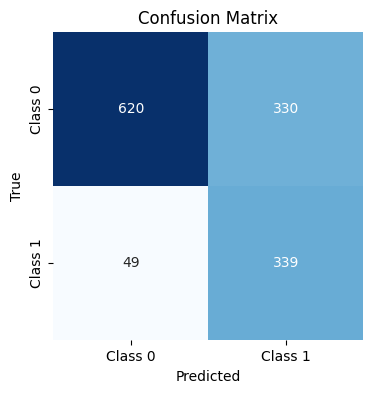

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(output, y)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




In [38]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(output, y)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7167414050822123
